In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Se propone una ecuación de la forma $E = E' - klog(\frac{[prod]}{[reac]}).$
Utilizando un algoritmo de optimización se minimiza en función de $E'$ una función de error (costo) igual a la suma de los cuadrados de las diferencias entre cada valor de E experimental, y el predicho con el modelo propuesto.

$
\begin{equation}
Cost = \Sigma  (E_{exp}^{(i)} - E_{modelo}^{(i)}(E'))^2
\end{equation}
$

Se busca un valor de $E'$ que minimize esta función y se elige este como potencial formal.

Potencial H2O2  = 0.569 V,
Potencial MnO4 = 1.132 V,
Potencial equivalencia = 0.971 V


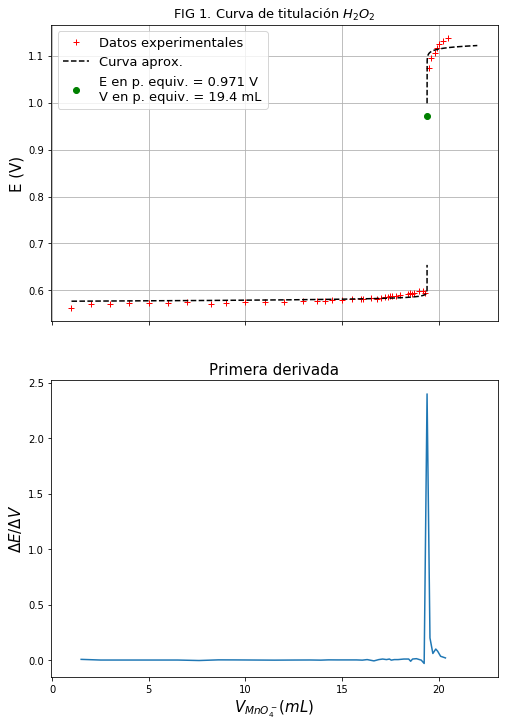

In [14]:
V = np.loadtxt("V.txt")
E = np.loadtxt("E.txt")/1000 #Pasa de mV a V


#dpH/dV vs avgV
dE = np.diff(E)
dV = np.diff(V)
dE_dV = dE/dV

avgV = [(V[n]+V[n+1])/2 for n in range(len(V)-1)]

Vequiv = avgV[np.argmax(dE_dV)]  #Punto máximo en derivada


Cmno = 0.05014    #Concent MnO4
Valic = 2.0       #Volumen de Ch2o2
Ch2o2 = (5/2)*Cmno*Vequiv/Valic   #Concent H2O2

#Encuentra potenciales formales con algoritmo descrito

def hyp1(e0,v): #función hipótesis para datos antes de p. equiv
    return e0 - (0.05917/10)*np.log10((Ch2o2*Valic - (5/2)*Cmno*v)/(50+v)) 
def cost1(e0):
    a = (E[:36] - hyp1(e0,V[:36])) #Sólo datos antes del punto de equivalencia
    return a @ a

init = 0 #Valor de prueba para E_0 (no importa el valor)
optim1 = minimize(cost1,init,method='BFGS')
E_0 = optim1.x[0] #Potencial formal de H2O2

def hyp2(e0,v): #función hipótesis para datos después de p. equiv
    return e0 - (0.05917/5)*np.log10(((2/5)*Ch2o2*Valic)/((v-Vequiv)*Cmno))
def cost2(e0):
    a = (E[36:] - hyp2(e0,V[36:]))
    return a @ a

optim2 = minimize(cost2,init,method='BFGS')
E_1 = optim2.x[0]  #Potencial formal MnO4

Eequiv = (2*E_0 + 5*E_1)/7
print("Potencial H2O2  = {0:.3f} V,\nPotencial MnO4 = {1:.3f} V,\nPotencial equivalencia = {2:.3f} V".format(E_0,E_1,Eequiv))


#PLOTS
fig,ax = plt.subplots(2,1,figsize=(8,12),sharex=True)

#plot derivada
ax[1].plot(avgV,dE_dV)
ax[1].set_xlabel(r"$V_{MnO_4^-} (mL)$",fontsize=15)
ax[1].set_ylabel(r'$\Delta E   /   \Delta V$',fontsize=15)
ax[1].set_title('Primera derivada',fontsize=15)

#Plot datos experimentales
ax[0].plot(V,E,'r+',label = "Datos experimentales")
#Plot aproximación
V1 = np.arange(1,Vequiv+1e-3,1e-3)
V2 = np.arange(Vequiv+1e-10,22,0.0001)
ax[0].plot(V1,hyp1(E_0,V1),'k--',label = "Curva aprox.")
ax[0].plot(V2,hyp2(E_1,V2),'k--')
#Punto de equivalencia
ax[0].plot(Vequiv,Eequiv,'go',label = "E en p. equiv. = {0:.3f} V \nV en p. equiv. = {1:} mL"\
                                    .format(Eequiv,Vequiv))
ax[0].set_title(r"FIG 1. Curva de titulación $H_2O_2$",fontsize=13)

ax[0].set_ylabel("E (V)",fontsize=15)
ax[0].legend(fontsize=13)
ax[0].grid()

#fig.savefig('Curva.png',dpi=400)

plt.show()